In [5]:
#import libraries
import os
import re
import numpy as np 
import pandas as pd 
from collections import Counter
import nltk

In [6]:


# read file
with open('./engmix.txt', 'r', encoding='ISO-8859-1') as f:
    file = f.readlines()
file[0][:3000]        

'a\n'

In [7]:
# process data - Tokenizing and Lowercasing
def process_data(lines):
    """
    Input: 
        A file_name which is found in your current directory. You just have to read it in. 
    Output: 
        words: a list containing all the words in the corpus (text file you read) in lower case. 
    """
    words = []        
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)
    
    return words

In [8]:
word_l = process_data(file)
vocab = set(word_l)
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['a', 'aa', 'aaa', 'aachen', 'aardvark', 'aardvarks', 'aaron', 'ab', 'aba', 'ababa']
There are 84070 unique words in the vocabulary.


In [9]:
# filtering mispells
def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

In [10]:
find_wrong_word('enjy is destinatn.', vocab)

['enjy', 'destinatn.']

In [11]:
def delete_letter(word, verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words 
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''
    
    delete_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")
    return delete_l

In [12]:
delete_word_l = delete_letter(word="cans",verbose=True)

input word : cans 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [13]:
def switch_letter(word, verbose=False):
    '''
    Input:
        word: input string
     Output:
        switches: a list of all possible strings with one adjacent charater switched
    ''' 
    
    switch_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1])>2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}") 
    return switch_l

In [14]:
switch_word_l = switch_letter(word="eta",verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']


In [15]:
def replace_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        replaces: a list of all possible strings where we replaced one letter from the original word. 
    ''' 
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    temp = l
                    replace_l.append(s[0]+temp)
        elif len(s) > 1:
            for l in letters:
                if l != s[1][0]:
                    temp = l + s[1][1:]
                    replace_l.append(s[0]+temp)
        
    replace_set = set(replace_l)
    
    # turn the set back into a list and sort it, for easier viewing
    replace_l = sorted(list(replace_set))
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")   
    return replace_l

In [16]:
replace_l = replace_letter(word='can',verbose=True)

Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace_l ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']


In [17]:
def insert_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        inserts: a set of all possible strings with one new letter inserted at every offset
    ''' 
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0]+l+s[1])

    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    
    return insert_l

In [18]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


In [19]:
def edit_one_letter(word, allow_switches = True):
    """
    Input:
        word: the string/word for which we will generate all possible wordsthat are one edit away.
    Output:
        edit_one_set: a set of words with one possible edit. Please return a set. and not a list.
    """
    
    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    
    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l
        
    edit_one_set = set(ans)

    return edit_one_set

In [20]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word : {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
#print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word : at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

Number of outputs from edit_one_letter('at') is 129


In [21]:
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word 
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''
    
    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = []
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))
        
    edit_two_set = set(ans)
    
    return edit_two_set

In [22]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


In [23]:
# 3.probability distribution
def get_count(word_l):
    '''
    Input:
        word_l: a set of words representing the corpus. 
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''
    word_count_dict = {}  
    word_count_dict = Counter(word_l)
    return word_count_dict

In [24]:
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

There are 84070 key values pairs
The count for the word 'thee' is 0


In [25]:
def get_probs(word_count_dict):
    '''
    Input:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    Output:
        probs: A dictionary where keys are the words and the values are the probability that a word will occur. 
    '''
    probs = {} 
    total = 1
    for word in word_count_dict.keys():
        total = total + word_count_dict[word]
        
    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word]/total
    return probs

In [26]:
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('you') is {probs['you']:.4f}")

Length of probs is 84070
P('you') is 0.0000


In [27]:
prob_df = pd.DataFrame({'word':probs.keys(), 'probability':probs.values()}).sort_values(by='probability', ascending=False)
prob_df.sample(5)

,word,probability
45494,meanness,0.000012
38976,intercepting,0.000012
57454,printmaking,0.000012
7078,bifurcated,0.000012
19787,departmentalise,0.000012


<Axes: xlabel='word'>

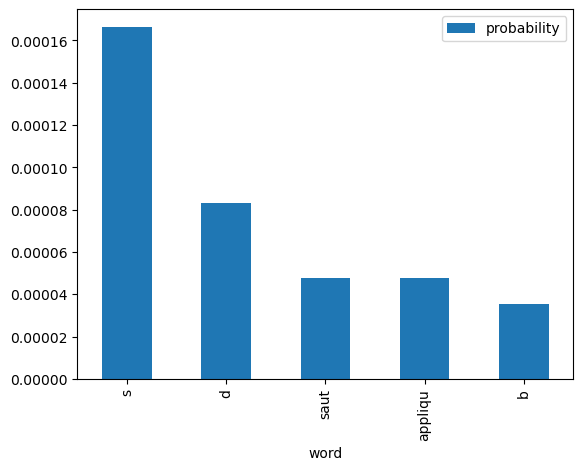

In [28]:
prob_df.head().plot.bar(x='word', y='probability')

In [29]:
def get_corrections(word, probs, vocab, n=2, verbose = False):
    '''
    Input: 
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output: 
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''
    
    suggestions = []
    n_best = []
    
   
    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
        
    best_words = {}
    
    for s in suggestions:
        best_words[s] = probs[s]
        
    best_words = sorted(best_words.items(), key=lambda x: x[1], reverse=True)
    
    n_best = best_words 
    
    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best

In [30]:
def get_correct_word(word, vocab, probs, n): 
    corrections = get_corrections(word, probs, vocab, n, verbose=False)
#    print(corrections)
    if len(corrections) == 0:
        return word
    
    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        #print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word

In [31]:
get_correct_word('anr', vocab, probs, 100)

'ant'

In [32]:
def autocorrect(sentence, vocab, probs):
   
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    #print(wrong_words)
    correct_words = []
    for word in sentence.strip().lower().split(" "):
        if word in wrong_words:
            correct_word = get_correct_word(word, vocab, probs, 15)
            #print(word, correct_word)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())

In [33]:
autocorrect("he is goinng home", vocab, probs)

Input sentence :  he is goinng home
Wrong words :  ['goinng']
Output Sentence :  He is going home


In [34]:
autocorrect("honsty is the best pooliccy", vocab, probs)

Input sentence :  honsty is the best pooliccy
Wrong words :  ['honsty', 'pooliccy']
Output Sentence :  Honesty is the best policy


In [35]:
from textblob import TextBlob
def autocorrect_sentence(sentence):
    # Create a TextBlob object
    blob = TextBlob(sentence)
    # Correct the entire sentence
    corrected_sentence = str(blob.correct())
    return corrected_sentence

In [36]:
def find_wrong(sent, vocab):
    wrong_words = []
    p = sent
    r = autocorrect_sentence(sent)
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    q = wrong_words
    a = []
    a.append(p)
    a.append(q)
    a.append(r)
    return a
find_wrong_word('enjy is destinatn.', vocab)

['enjy', 'destinatn.']

In [ ]:
from tkinter import *
master = Tk()
master.geometry('1000x600')
master.title('AUTOCORRECTOR FEATURE')
label = Label(master, text ='AUTOCORRECTOR FEATURE USING NLP',font = 38, justify = 'center', bg= 'blue',fg= 'white',width=60)
label.place(x=150,y=7)
Label(master, text='Enter your text',bg = 'white',font=('arial',16,'bold')).place(x=130,y=80)
e1 = Entry(master,font=('arial',16,'bold'),width=50)
e1.place(x=300, y=80)
def shofuncti( ):
    p1 = e1.get()
    x = find_wrong(p1, vocab)
    sec = StringVar()
    sec.set(x[0])
    Label(master, text='Input sentence :',font=('arial',16,'bold')).place(x=130,y=200)
    label = Label(master,textvariable=sec, font=('arial',16,'bold'),bg='red', fg='white',width=50).place(x=320,y=200)
    sec = StringVar()
    sec.set(x[1])
    Label(master, text='Wrong words :',font=('arial',16,'bold')).place(x=130,y=280)
    label = Label(master,textvariable=sec, font=('arial',16,'bold'),bg='red', fg='black',width=50).place(x=300,y=280)
    sec = StringVar()
    sec.set(x[2])
    Label(master, text='Output Sentence :',font=('arial',16,'bold')).place(x=130,y=360)
    label = Label(master,textvariable=sec, font=('arial',16,'bold'),bg='red', fg='black',width=50).place(x=340,y=360)
Button(master, text='Click here',font=('arial',12,'bold'),command=shofuncti).place(x=350,y=140)
master.mainloop()